In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1.1 Dilation

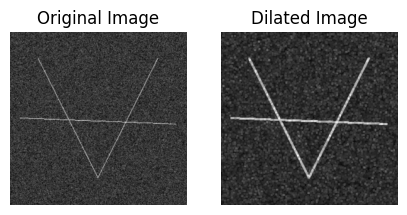

In [14]:
dilationa = 'dilation.jpg'
image = cv2.imread(dilationa, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5,5), np.uint8)

dilated_image = cv2.dilate(image, kernel, iterations=1)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.show()

1.2 Erosion

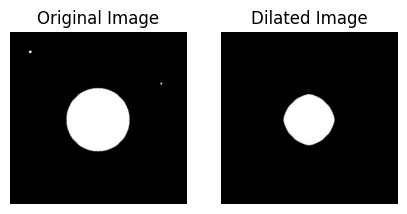

In [18]:
img = cv2.imread('erosion.jpg', 0)
kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(img, kernel, iterations=8)
cv2.imwrite('erosion.jpg', erosion)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Post Erosion Image')
plt.axis('off')

plt.show()


1.3 Opening

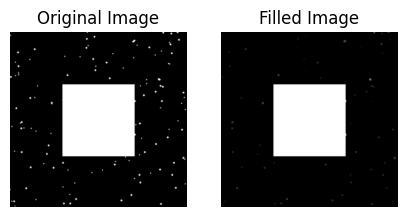

In [20]:
img = cv2.imread('opening.jpg', 0)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opening, cmap='gray')
plt.title('Filled Image')
plt.axis('off')

plt.show()

1.4 Closing

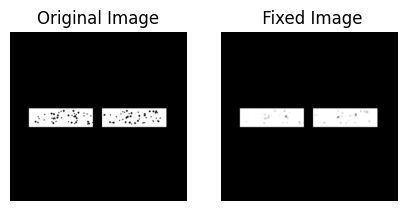

In [22]:
img = cv2.imread('closing.jpg', 0)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(closing, cmap='gray')
plt.title(' Fixed Image')
plt.axis('off')

plt.show()


1.5 Hit or Miss Transform

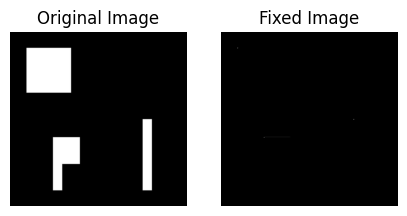

In [25]:
img = cv2.imread('hit.jpg', 0)

kernel_hm = np.array([[-1, -1, -1],
                       [-1,  1,  1],
                       [-1,  1,  1]], dtype=np.int32)
hit_miss = cv2.morphologyEx(img, cv2.MORPH_HITMISS, kernel_hm)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hit_miss, cmap='gray')
plt.title('Fixed Image')
plt.axis('off')

plt.show()

1.6 Boundary Extraction

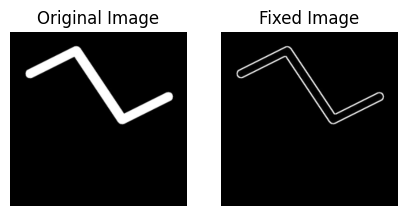

In [27]:
img = cv2.imread('boundary.jpg', 0)

eroded = cv2.erode(img, kernel, iterations=1)
boundary = cv2.subtract(img, eroded)

plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(boundary, cmap='gray')
plt.title('Fixed Image')
plt.axis('off')

plt.show()

1.7 Hole Filling

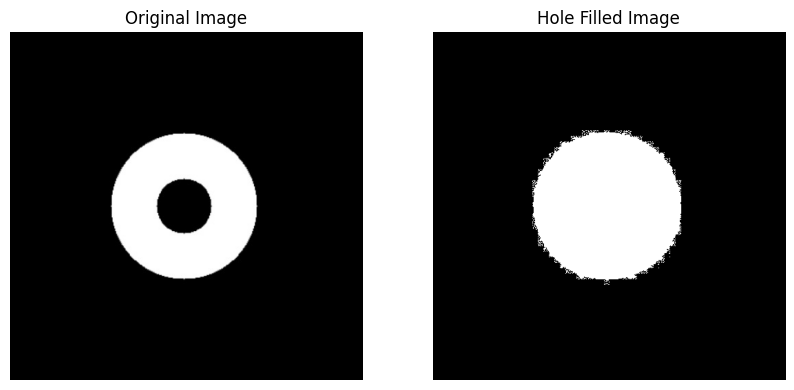

In [29]:
img = cv2.imread('hole_filling.jpg', 0)

img_floodfill = img.copy()
h, w = img.shape[:2]
mask = np.zeros((h + 2, w + 2), np.uint8)

cv2.floodFill(img_floodfill, mask, (0, 0), 255)

img_floodfill_inv = cv2.bitwise_not(img_floodfill)

hole_filled_image = img | img_floodfill_inv

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hole_filled_image, cmap='gray')
plt.title('Hole Filled Image')
plt.axis('off')

plt.show()

2.0 Deskewing

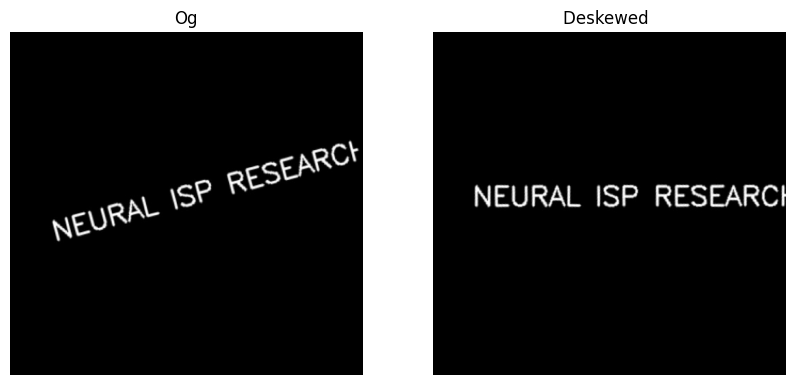

In [38]:
img = cv2.imread('deskew.jpg', cv2.IMREAD_GRAYSCALE)

coords = np.column_stack(np.where(img > 0))
angle = cv2.minAreaRect(coords)[-1]

if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle

(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
deskewed_image = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Og')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(deskewed_image, cmap='gray')
plt.title('Deskewed ')
plt.axis('off')

plt.show()